In [1]:
! more -n 10 G:/python/pydata-book-2nd-edition/datasets/babynames/yob1880.txt

无效参数 - /python


In [2]:
%load_ext Cython

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.options.display.max_rows = 10
%matplotlib notebook

In [5]:
names1880 = pd.read_csv('G:/python/pydata-book-2nd-edition/datasets/babynames/yob1880.txt',
                       names=['name', 'sex', 'births'])

In [6]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [7]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [8]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'G:/python/pydata-book-2nd-edition/datasets/babynames/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# 将所有内容粘进一个DataFrame
names = pd.concat(pieces, ignore_index=True)

In [9]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [10]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [11]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<IPython.core.display.Javascript object>


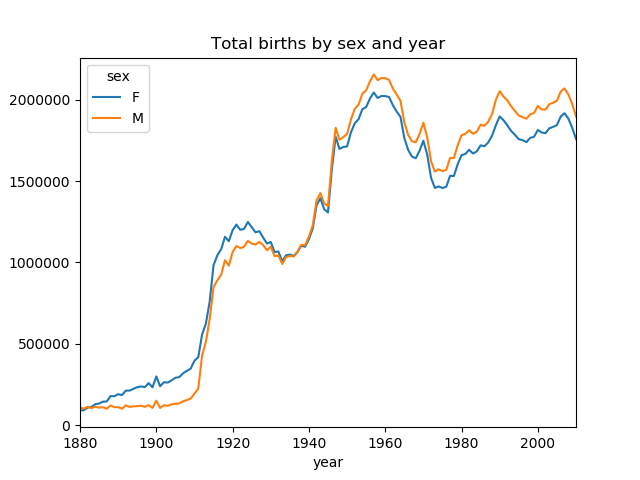

In [12]:
total_births.plot(title='Total births by sex and year')

In [13]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

In [14]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [15]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [16]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [17]:
grouped = names.groupby(['year', 'sex'])

In [18]:
top1000 = grouped.apply(get_top1000)

In [19]:
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [20]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [21]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [22]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
                                                                   

In [23]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### 14.3.1 分析命名趋势

In [24]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [25]:
total_births = top1000.pivot_table('births', index='year',
                                  columns='name', aggfunc=sum)

In [26]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [28]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

In [29]:
subset

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8179.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9427.0,2338.0,9253.0,NaN
...,...,...,...,...
2006,15140.0,414.0,4073.0,596.0
2007,14405.0,443.0,3665.0,597.0
2008,13273.0,379.0,3478.0,543.0


<IPython.core.display.Javascript object>


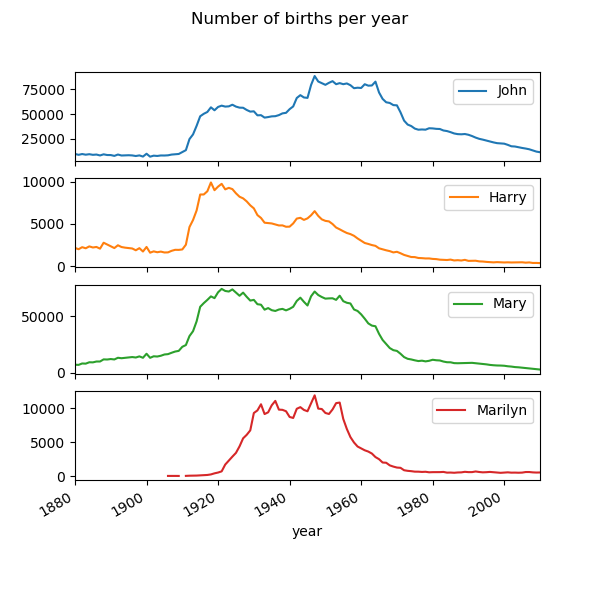

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000106EC710>,
      dtype=object)

In [30]:
subset.plot(subplots=True, figsize=(6, 6), grid=False, 
           title='Number of births per year')

### 14.3.2 评估命名多样性的增长

In [31]:
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

<IPython.core.display.Javascript object>


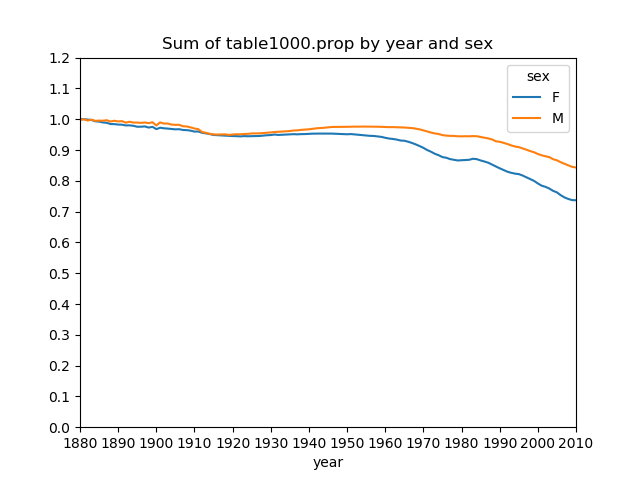

In [32]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [33]:
df = boys[boys.year == 2010]

In [34]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [35]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [36]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [37]:
prop_cumsum.values.searchsorted(0.5)

116

In [38]:
df = boys[boys.year == 1900]

In [39]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [40]:
in1900.values.searchsorted(0.5) + 1

25

In [41]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [42]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [43]:
diversity = diversity.unstack('sex')

In [44]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<IPython.core.display.Javascript object>


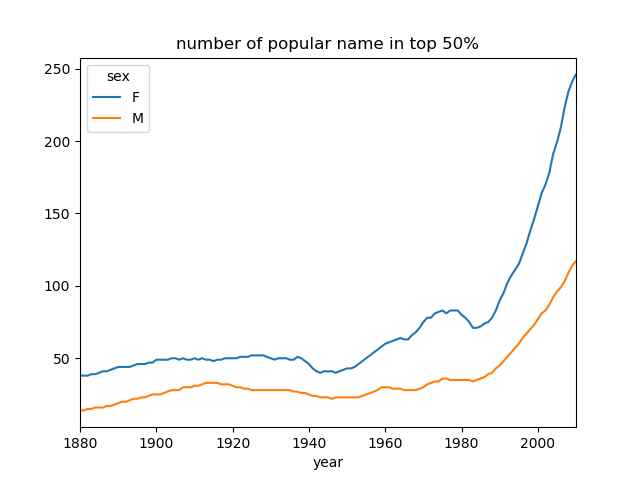

In [45]:
diversity.plot(title="number of popular name in top 50%")

### 14.3.3 最后一个字母的变革

In [47]:
# 从name列提取最后一个字母
get_last_latter = lambda x : x[-1]

In [49]:
last_latters = names.name.map(get_last_latter)

In [50]:
last_latters.name = 'last_latter'

In [54]:
table = names.pivot_table('births', index=last_latters, 
                         columns=['sex', 'year'], aggfunc=sum)

In [58]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [59]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_latter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [60]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [61]:
letter_prop = subtable / subtable.sum()

In [62]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_latter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

In [63]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


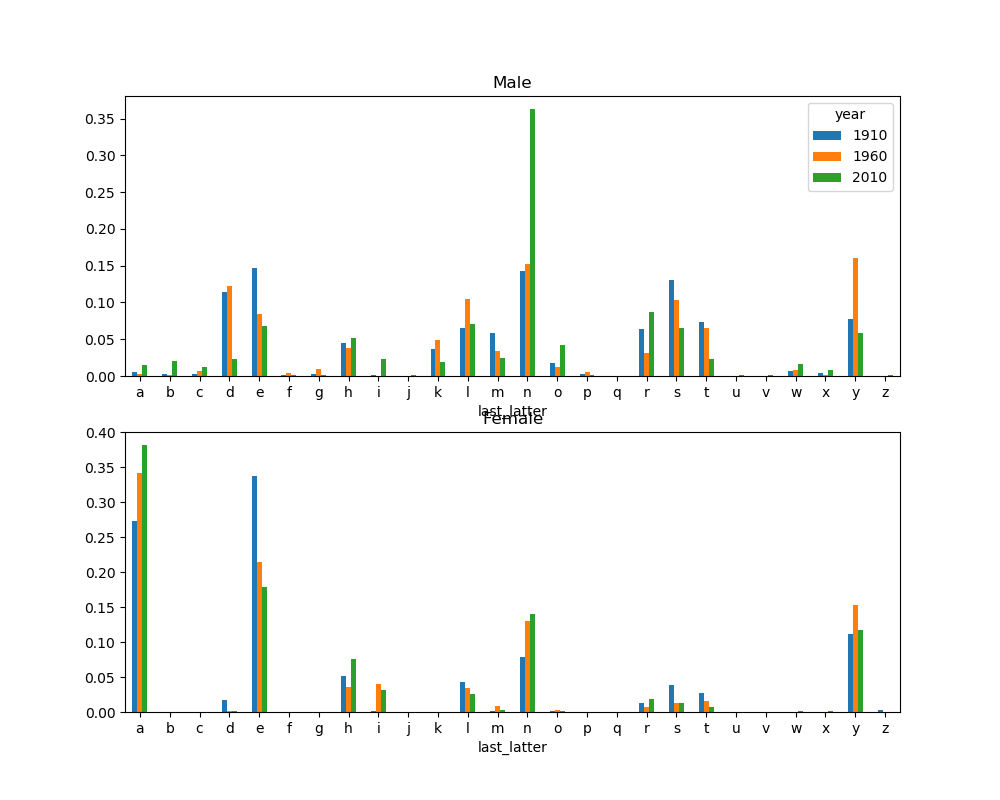

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

In [66]:
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [68]:
letter_prop = table / table.sum()

In [69]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [73]:
dny_ts.head

<bound method NDFrame.head of last_latter         d         n         y
year                                     
1880         0.083055  0.153213  0.075760
1881         0.083247  0.153214  0.077451
1882         0.085340  0.149560  0.077537
1883         0.084066  0.151646  0.079144
1884         0.086120  0.149915  0.080405
...               ...       ...       ...
2006         0.025075  0.351666  0.060338
2007         0.024451  0.358274  0.059634
2008         0.023574  0.361101  0.060342
2009         0.023398  0.362523  0.057223
2010         0.023387  0.362771  0.058168

[131 rows x 3 columns]>

<IPython.core.display.Javascript object>


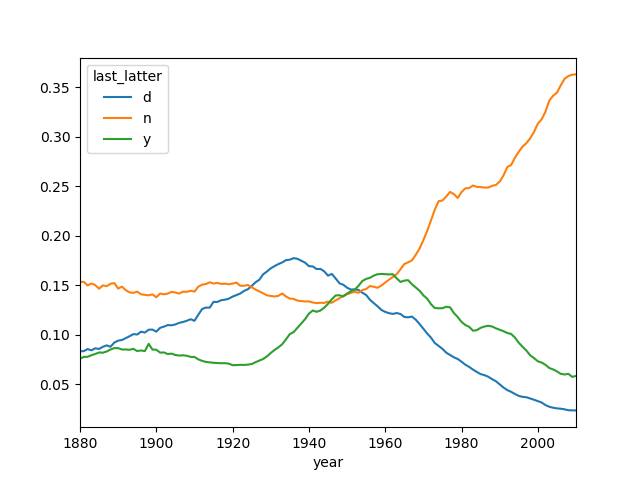

In [75]:
dny_ts.plot()

In [76]:
all_names = pd.Series(top1000.name.unique())

In [77]:
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
Length: 6868, dtype: object

In [79]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [80]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [81]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [85]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [86]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')

In [88]:
table = table.div(table.sum(1), axis=0)

In [90]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<IPython.core.display.Javascript object>


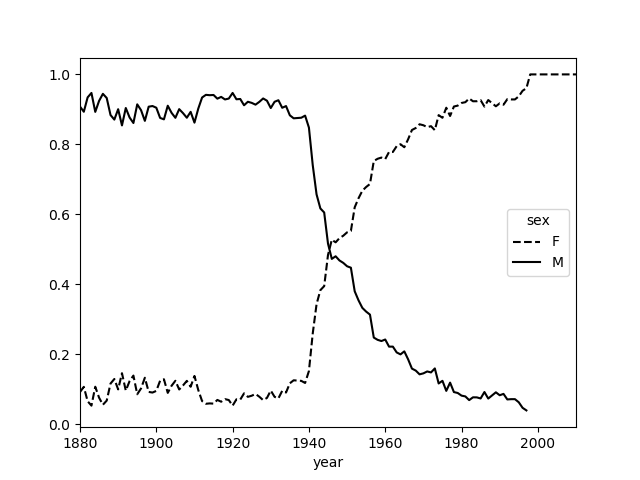

In [91]:
table.plot(style={'M': 'k-', 'F': 'k--'})